<a href="https://colab.research.google.com/github/rizalpernata1/telco_provider_customer_churn_prediction_2022/blob/main/telco_provider_customer_churn_prediction_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
from google.colab import files
datatrain = files.upload()

Saving Data Train.csv to Data Train.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.StringIO(datatrain['Data Train.csv'].decode('utf-8')))

In [ ]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df.shape

(4250, 20)

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [ ]:
df.account_length.nunique()

215

In [ ]:
df.area_code.nunique()

3

# Data Pre-processing

## Cleaning Data

In [ ]:
def data_clean(df):    
    df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']


    df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
    df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 

    df.drop(columns= ['state', 'area_code'], inplace= True)
    #df.area_code = pd.Categorical(df.area_code).codes



    df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                    'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                     'total_eve_minutes', 'total_night_minutes'], inplace=True)
    return df

In [ ]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

## Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split 

X = df.drop(columns= ['churn'])
y = df['churn']

x_train, x_val, y_train, y_val = train_test_split(X, y , test_size=.25, stratify= y, random_state=1) 
y_train.value_counts(), y_val.value_counts()

(no     2739
 yes     448
 Name: churn, dtype: int64,
 no     913
 yes    150
 Name: churn, dtype: int64)

## Cleaning Function

In [ ]:
x_train  = data_clean(x_train)
y_train = pd.Categorical(y_train).codes

x_val  = data_clean(x_val)
y_val= pd.Categorical(y_val).codes

print(df.international_plan.value_counts())
df.head()

no     3854
yes     396
Name: international_plan, dtype: int64


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## Displaying Numerical Columns

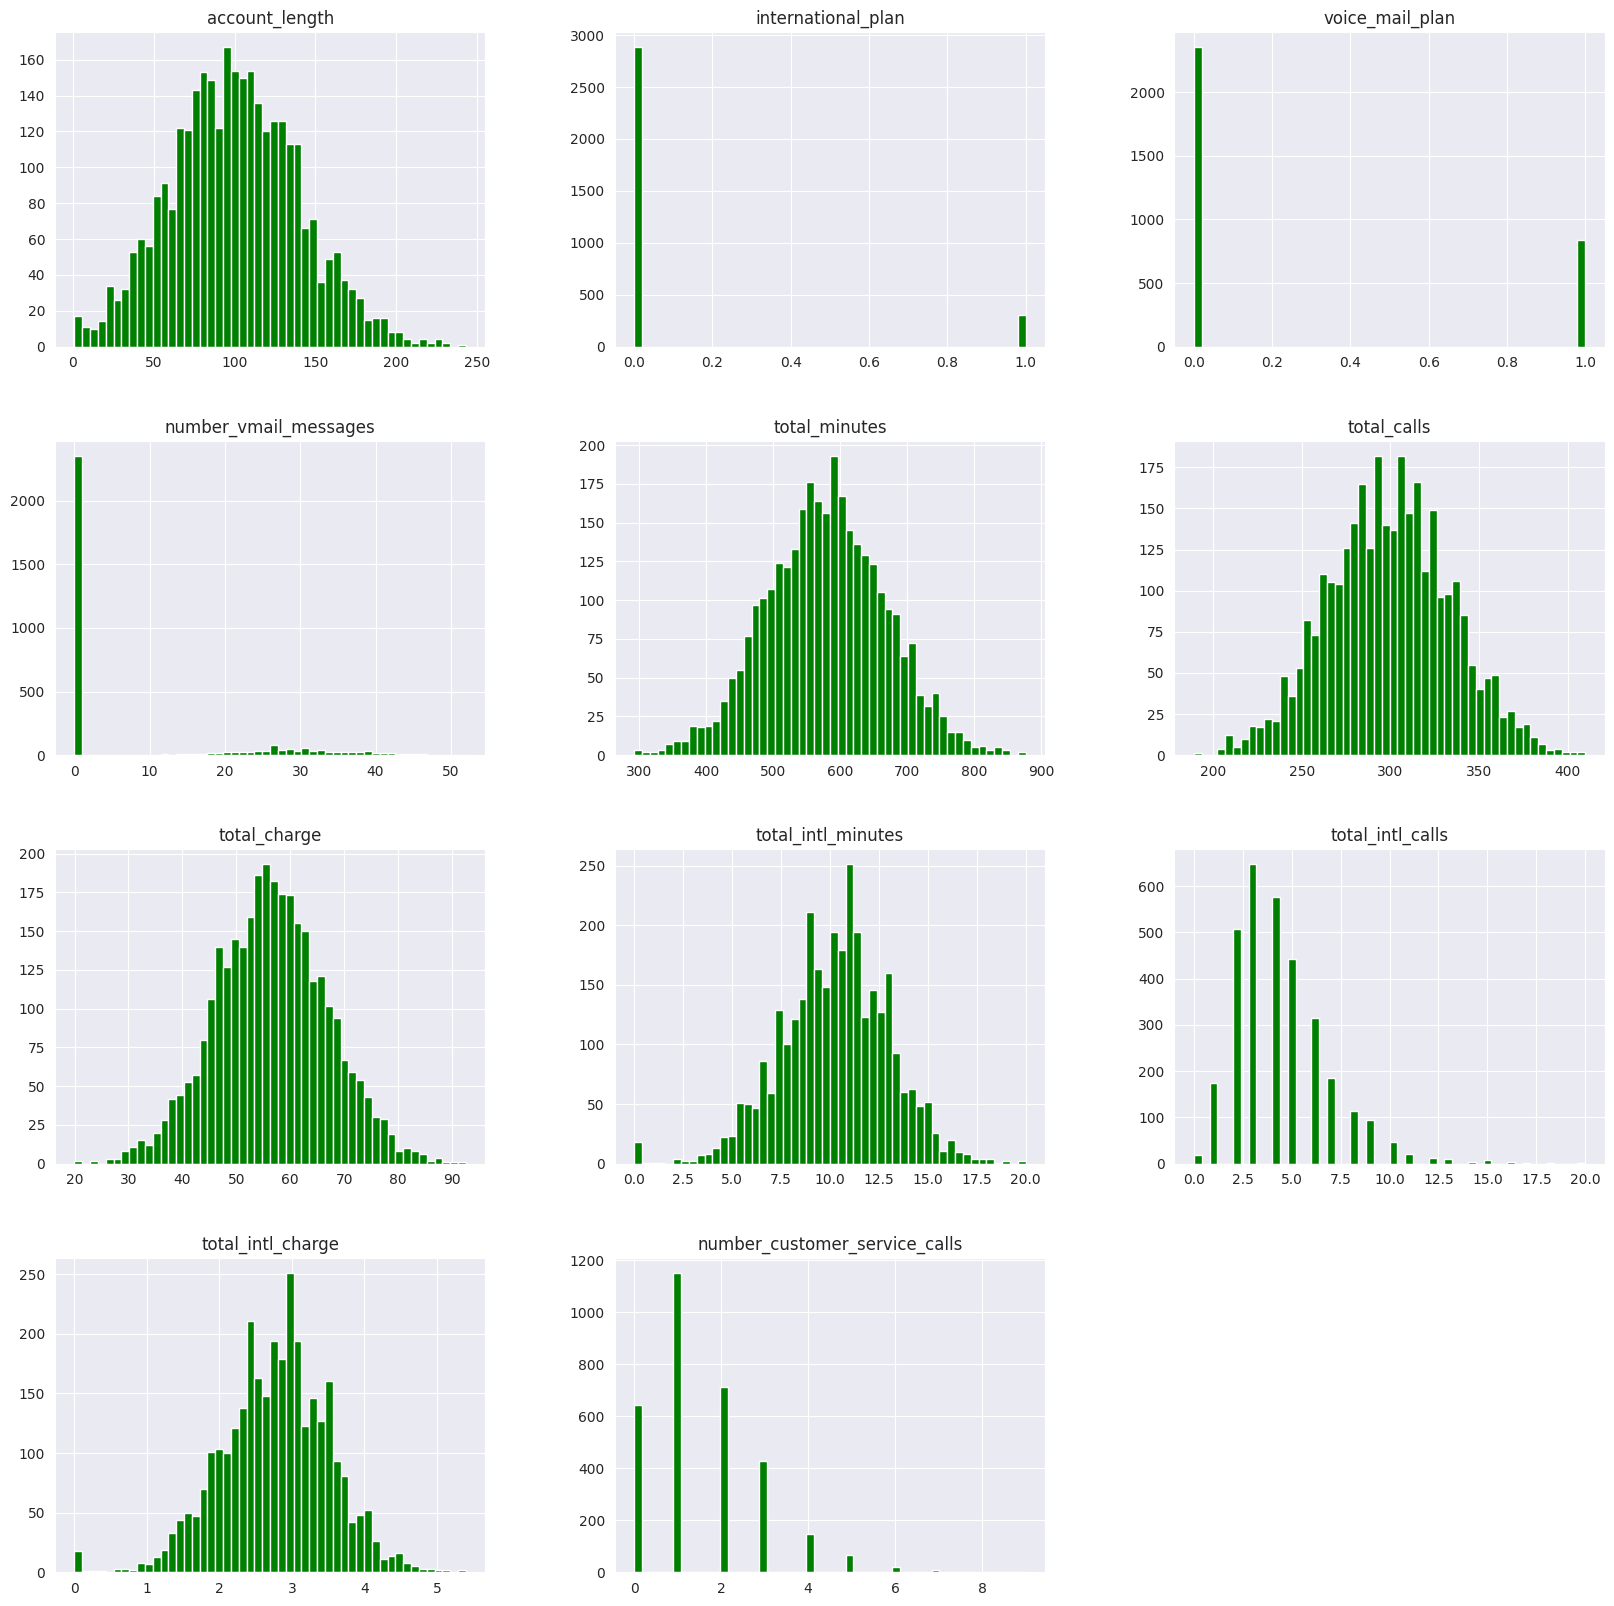

In [ ]:
import seaborn as sns
sns.set_style('dark')
temp = x_train[['account_length', 'international_plan','voice_mail_plan', 'number_vmail_messages', 
           'total_minutes','total_calls', 'total_charge','total_intl_minutes',
       'total_intl_calls', 'total_intl_charge','number_customer_service_calls' ]]
temp.hist(bins=50,figsize=(20,20),color='green');

# Machine Learning Algorithm

## Model LogisticRegression to Predict Digit Labels

In [ ]:
from sklearn.linear_model import LogisticRegression

lr  = LogisticRegression(max_iter=300,)
lr .fit(x_train,y_train )
lr .score(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8704110448697835

## Model RandomForestClassifier for Estimator that Fits a number of Decision

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train )
clf.score(x_train, y_train)

1.0

In [ ]:
pre = clf.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.9774223894637818

## Use GradientBoostingClassifier to Create Strong Predictive Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
xg.fit(x_train,y_train )
xg.score(x_train, y_train)

0.9996862252902416

In [ ]:
pre = xg.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.9783631232361242

## Loading datatest

In [ ]:
from google.colab import files
datatest = files.upload()

Saving Data Test.csv to Data Test.csv


In [ ]:
test = pd.read_csv(io.BytesIO(datatest['Data Test.csv']))
x_test =test.drop(columns='id')

## Test Cleaning

In [ ]:
x_test = data_clean(x_test)
x_test.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge
0,128,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,118,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,62,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,93,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,174,0,0,0,15.5,5,4.19,3,652.1,303,55.96


## Use XG Boost to Predict the Test Values

In [ ]:
pre = xg.predict(x_test)
print(pre[:5])
ansXG = pd.read_csv(io.BytesIO(datatest['Data Test.csv']))
ansXG.churn = pre 
ansXG.to_csv('HasilXgBoost', index=False)
ansXG.head()

[0 0 0 0 0]


<ipython-input-24-d7a01a8ee7d1>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ansXG.churn = pre


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


## Use Randomforest to Predict the Test Values

In [ ]:
pre = clf.predict(x_test)
print(pre[:5])
ansCLF = pd.read_csv(io.BytesIO(datatest['Data Test.csv']))
ansCLF.churn = pre 
ansCLF.to_csv('HasilRandomForest.csv', index=False)
ansCLF.head()

[0 0 0 0 0]


<ipython-input-25-9f02f9f79883>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ansCLF.churn = pre


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
